# Hidden Markov Models

## Section 1: Introduction to Sequential Data

### What is Sequential Data?
Sequential data is a type of data where the order of the elements matters. Each element in the sequence is dependent on the previous elements, making it essential to consider the temporal or sequential relationships when analyzing such data. Examples of sequential data include time series data, text data, and biological sequences.

### iid vs. Sequential Data
In traditional machine learning, we often assume that data points are independent and identically distributed (iid). This means that each data point is generated independently from the same probability distribution. However, in sequential data, this assumption does not hold true because the elements in the sequence are dependent on each other.

---

We need to identify a model that can capture these dependencies and relationships within the sequence. Generally speaking, **State Space Models** are a good choice for modeling sequential data, as they can represent the underlying states and transitions between them, as well as the fact that future states depend on past states, especially the most recent ones.

# Markov Models
Assuming we have $N$ states, the *product rule* allows us to express the joint probability of a sequence of states as follows:

$$p(x_1,\ldots, x_N) = \prod_{n=1}^{N} p(x_n | x_1, \ldots, x_{n-1})$$

If we assume that each of the states only depends on the previous state (the *Markov assumption*), we can simplify the expression to:

$$p(x_1,\ldots, x_N) = p(x_1) \prod_{n=2}^{N} p(x_n | x_{n-1})$$

Therefore, we obtain a **First-Order Markov Model**. This model captures the dependencies between consecutive states in a sequence, making it suitable for modeling sequential data where the current state is influenced by the immediate past state.

![Screenshot 2025-12-11 152132.png](<attachment:Screenshot 2025-12-11 152132.png>)

>First-Order Markov Model: Each state depends only on the previous state (Image Source: Bishop, "Pattern Recognition and Machine Learning")
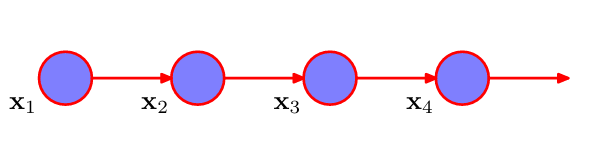

If we use such model, the distribution of the next state only depends on the current state, i.e., will be independent of all previous states. This is called the **Markov Property**.

This is still very restrictive, but we can extend it to a **Higher-Order Markov Model** by assuming that each state depends on the previous $k$ states. For example, in a Second-Order Markov Model, each state depends on the two previous states. The joint probability distribution can be expressed as:

$$p(x_1,\ldots, x_N) = p(x_1) p(x_2 | x_1) \prod_{n=3}^{N} p(x_n | x_{n-1}, x_{n-2})$$

However, as the order of the Markov model increases, the **number of parameters** required to specify the model **grows exponentially**, which can lead to overfitting and computational challenges. Specifically, for a Markov model of order $M$ with $k$ possible states, the number of transition probabilities that need to be estimated is $$k^{M-1} (k - 1)$$ which can become infeasible for large values of $k$ or $M$.

Therefore, our goal is to find a model that can effectively capture the dependencies in sequential data without requiring an impractical number of parameters. We can achieve this by introducing latent variables to construct a rich class of models out of simple components. 
For each state $x_n$, we introduce a corresponding latent variable $z_n$. The latent variables are assumed to follow a Markov model, while the observed states are conditionally independent given the latent variables. This leads us to the concept of **State Space Models** .

The State Space Model can be represented as follows:

![Screenshot 2025-12-16 110647.png](<attachment:Screenshot 2025-12-16 110647.png>)

The joint probability distribution of the observed states and latent variables can be expressed as:
$$p(x_1, \ldots, x_N, z_1, \ldots, z_N) = p(z_1) \prod_{n=2}^{N} p(z_n | z_{n-1}) \prod_{n=1}^{N} p(x_n | z_n)$$

We can see that the latent variables $z_n$ form a Markov chain, while the observed states $x_n$ are conditionally independent given the latent variables. This structure allows us to model complex dependencies in sequential data while keeping the number of parameters manageable. Moreover, the prediction of the next observation $x_{n+1}$ depends on the current latent state $z_n$, which captures the necessary information from the past states. However, the observable states do not satisfy the Markov property directly, as they depend on the latent states.

If the latent variables are discrete, we obtain a **Hidden Markov Model (HMM)**. 
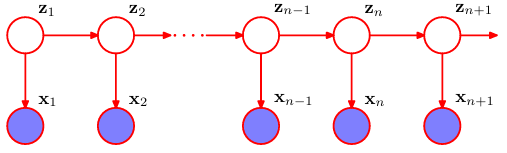

## Section 2: Hidden Markov Model (HMM) Overview

# Hidden Markov Model (HMM)
A Hidden Markov Model (HMM) is a statistical model that represents systems with hidden states. It is widely used in various fields such as speech recognition, bioinformatics, and finance. An HMM consists of the following components:

1. **Latent States**: A finite set of hidden states $Z$ that the system can be in. These states are not directly observable.
2. **Observable States**: A finite set of observable symbols or outputs $X$ that are generated by the hidden states.
3. **Transition Probabilities**: The probabilities of transitioning from one hidden state to another. These are represented by a matrix $A$ of *transition probabilities*.
4. **Emission Probabilities**: The probabilities of observing a particular symbol given a hidden state. These are defined by a set of parameters $\phi$ governing the distribution of observable states given the hidden states.
5. **Initial State Probabilities**: The probabilities of starting in each hidden state. These are represented by a vector $\pi$ of *initial state probabilities*.

### Transition Probabilities
The transition probabilities define the likelihood of moving from one hidden state to another. They are represented by a matrix $A$, where each element $A_{ij}$ represents the probability of transitioning from state $i$ to state $j$:
$$A_{ij} = P(z_{n} = j | z_{n-1} = i)$$
We can derive the **conditional distribuiton** of the hidden states as:
$$p(z_n | z_{n-1}) = \prod_{i=1}^{K} \prod_{j=1}^{K} A_{ij}^{z_{n-1}=i, z_n=j}$$
### Emission Probabilities
The emission probabilities define the likelihood of observing a particular state $x$ given a hidden state $z$. They are defined by a set of parameters $\phi$ that govern the distribution of observable states given the hidden states. We can express the conditional distribution of the observable states given the hidden states as:
$$p(x_n | z_n) = p(x_n | z_n, \phi) = \prod_{k=1}^{K} p(x_n | \phi_k)^{z_n=k}$$

### Initial State Probabilities
The initial state probabilities define the likelihood of starting in each hidden state. They are represented by a vector $\pi$, where each element $\pi_i$ represents the probability of starting in state $i$:
$$\pi_i = P(z_1 = i)$$
so that we can express the distribution of the initial hidden state as:
$$p(z_1) = \prod_{k=1}^{K} \pi_k^{z_1=k}$$


Therefore, we can state the full joint distribution of the observed states and hidden states in an HMM as:
$$p(X, Z | \theta) = p(z_1|\pi) \prod_{n=2}^{N} p(z_n | z_{n-1}, A) \prod_{m=1}^{N} p(x_m | z_m, \phi)$$
where $\theta = \{\pi, A, \phi\}$ represents all the parameters of the HMM.

In the next code cells, we will implement the HMM using Python and explore the implementatioon of the generation process.

We will use a **multivariate Gaussian distribution** for the emission probabilities in this implementation:
$$\phi _k = \mathcal{N}(\mu_k, \Sigma_k) \rightarrow p(x_n | z_n = k) = \mathcal{N}(x_n | \mu_k, \Sigma_k)$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [3]:
import numpy as np

class HiddenMarkovModel:
    def __init__(self, K, D):
        """
        Initialize an HMM with K hidden states and D-dimensional observations.
        """
        self.K = K  # number of hidden states
        self.D = D  # dimension of observations

        # Initial state distribution
        self.pi = np.ones(K) / K

        # Transition matrix (A) almost diagonal
        self.A = np.ones((K, K)) * 0.1 / (K - 1) + np.eye(K) * 0.9
        self.A /= np.sum(self.A, axis=1, keepdims=True) # normalize rows to ensure they sum to 1

        # Emission parameters: means and covariances for each hidden state
        self.mu = [np.random.rand(D) * 10 for _ in range(K)] # Random means
        self.Sigma = [np.eye(D) for _ in range(K)] # Identity covariance

    def get_emission_prob(self, x):
        """
        Compute emission probabilities for observation x for all hidden states.
        Returns a vector of size (T, K) where T is the number of observations.
        """

        T = x.shape[0]
        B = np.zeros((self.K, T))
        for k in range(self.K):
            B[:, k] = multivariate_normal.pdf(x, mean=self.mu[k], cov=self.Sigma[k], allow_singular=True)
        return B

    def generate_sequence(self, N):
        """
        Generate a sequence of observations and hidden states of length N.
        """
        Z_true = np.zeros(N, dtype=int)
        X = np.zeros((N, self.D))

        # Initial state
        Z_true[0] = np.random.choice(self.K, p=self.pi)

        # Generate first observation
        X[0] = np.random.multivariate_normal(self.mu[Z_true[0]], self.Sigma[Z_true[0]])

        for n in range(1, N):
            # Transition to next state
            Z_true[n] = np.random.choice(self.K, p=self.A[Z_true[n-1], :])

            # Generate observation
            X[n] = np.random.multivariate_normal(self.mu[Z_true[n]], self.Sigma[Z_true[n]])

        return X, Z_true
    

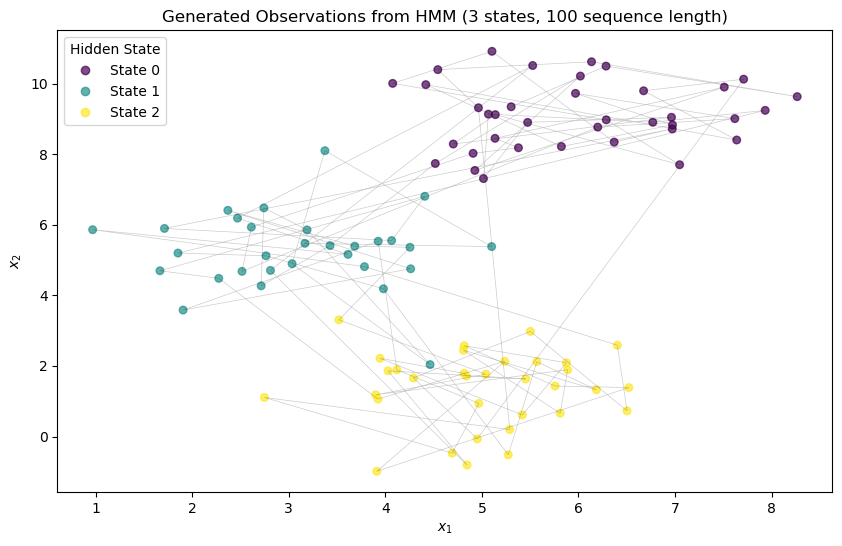

In [4]:
# Using the HMM class to generate a sequence
K = 3  # number of hidden states
D = 2  # dimension of observations
N = 100  # length of the sequence

hmm = HiddenMarkovModel(K=K, D=D)

X, Z_true = hmm.generate_sequence(N=N)

#Adjusting means for better visualization
hmm.mu = [np.array([1, 1]), np.array([5, 5]), np.array([1, 5])]
hmm.Sigma = [np.eye(D) * 0.5, np.eye(D) * 0.5, np.eye(D) * 0.5]

# Plot the generated observations colored by their hidden states
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=Z_true, cmap='viridis', s=30, alpha=0.7, label='Observations')
plt.plot(X[:, 0], X[:, 1], 'k-', alpha=0.2, linewidth=0.5, label='Trajectory')
plt.title(f'Generated Observations from HMM ({K} states, {N} sequence length)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'State {k}' for k in range(K)], title="Hidden State")
plt.show()

>N.B: The implementation will focus on generating sequences of observations and hidden states based on the defined HMM parameters. In this case, emission probabilities are modeled using multivariate Gaussian distributions. If you want discrete emissions, you can modify the emission probability section by defining a table of probabilities for each observable symbol given the hidden states.

## Section 3: Maximum Likelihood Estimation and Inference in HMMs
Having observed a sequence of data generated by an HMM, our goal is to estimate the model parameters $\theta = \{\pi, A, \phi\}$ that maximize the likelihood of the observed data, that is expressed as $$p(X | \theta) = \sum_{Z} p(X, Z | \theta)$$

We can not perform the summation directly because the number of possible hidden state sequences grows exponentially with the length of the observed sequence.

We therefore turn to the expectation-maximization (EM) algorithm, specifically the Baum-Welch algorithm, to iteratively estimate the parameters of the HMM. The EM algorithm starts with the initial selection for the model parameters, denoted as $\theta^{old}$, and alternates between two steps until convergence:
1. **Expectation Step (E-step)**: we take the current estimate of the parameters $\theta^{old}$ and find the posterior distribution over the hidden states given the observed data, that is $p(Z | X, \theta^{old})$. We then compute the expected value of the complete-data log-likelihood with respect to this posterior distribution, which is given by:
$$Q(\theta, \theta^{old}) = \sum_{Z} p(Z | X, \theta^{old}) \log p(X, Z | \theta)$$

2. **Maximization Step (M-step)**: we maximize the expected complete-data log-likelihood $Q(\theta, \theta^{old})$ with respect to the model parameters $\theta$ to obtain the updated parameter estimates $\theta^{new}$:
$$\theta^{new} = \arg \max_{\theta} Q(\theta, \theta^{old})$$


### E-Step
In the E-step, we compute the expected value of the complete-data log-likelihood with respect to the posterior distribution of the hidden states given the observed data and the current parameter estimates. At this point , we need to introduce some notations. $$ \gamma_n(k) = P(z_n = k | X, \theta^{old}) $$ represents the posterior probability of being in state $k$ at time $n$, given the observed data and current parameter estimates. Similarly, we define $$ \xi_n(i, j) = P(z_{n-1} = i, z_n = j | X, \theta^{old}) $$ as the posterior probability of transitioning from state $i$ at time $n-1$ to state $j$ at time $n$.
We specify that we can store $\gamma_n(k)$ and $\xi_n(i, j)$ respectively as a set of $K$-dimensional vectors and $K \times K$ matrices for each value $n$.

Using these notations and the $p(X, Z | \theta)$ defined earlier, we can express the expected complete-data log-likelihood as:
$$Q(\theta, \theta^{old}) = \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_n(k) \log p(x_n | z_n = k, \phi) + \sum_{n=2}^{N} \sum_{i=1}^{K} \sum_{j=1}^{K} \xi_n(i, j) \log A_{ij} + \sum_{k=1}^{K} \gamma_1(k) \log \pi_k$$

In order to compute $\gamma_n(k)$ and $\xi_n(i, j)$, we can use the **Forward-Backward Algorithm**. This algorithm consists of two main passes through the data:
1. **Forward Pass**: In this pass, we compute the forward probabilities $\alpha_n(k) = P(x_1, x_2, \ldots, x_n, z_n = k | \theta^{old})$ for each time step $n$ and state $k$. The forward probabilities are computed recursively as follows:
   - **Initialization**:
     $$\alpha_1(k) = \pi_k p(x_1 | z_1 = k, \phi^{old}) \space \space  \forall  k = 1, \ldots, K$$
   - **Recursion**:
     $$\alpha_n(j) = \left( \sum_{i=1}^{K} \alpha_{n-1}(i) A_{ij}^{old} \right) p(x_n | z_n = j, \phi^{old})$$
2. **Backward Pass**: In this pass, we compute the backward probabilities $\beta_n(k) = P(x_{n+1}, x_{n+2}, \ldots, x_N | z_n = k, \theta^{old})$ for each time step $n$ and state $k$. The backward probabilities are computed recursively as follows:
   - **Initialization**:
        $$\beta_N(k) = 1 \space \space  \forall  k = 1, \ldots, K$$
    - **Recursion**:
        $$\beta_n(i) = \sum_{j=1}^{K} A_{ij}^{old} p(x_{n+1} | z_{n+1} = j, \phi^{old}) \beta_{n+1}(j)$$
Using the forward and backward probabilities, we can compute the posterior probabilities $\gamma_n(k)$ and $\xi_n(i, j)$ as follows:
- **Posterior Probability of State**:
$$\gamma_n(k) = \frac{\alpha_n(k) \beta_n(k)}{P(X | \theta^{old})}$$
- **Posterior Probability of Transition**:
$$\xi_n(i, j) = \frac{\alpha_{n-1}(i) A_{ij}^{old} p(x_n | z_n = j, \phi^{old}) \beta_n(j)}{P(X | \theta^{old})}$$

From Posterior Probabilty of state we can sum both sides over $k$ to obtain the likelihood of the observed data:
$$P(X | \theta^{old}) = \sum_{k=1}^{K} \alpha_n(k) \beta_n(k)$$
that is valid for any $n = 1, \ldots, N$.

Therefore choosing $n = N$, we have:
$$P(X | \theta^{old}) = \sum_{k=1}^{K} \alpha_N(k)$$


Since $\alpha_n(k)$ and $\beta_n(k)$ tend to become very small as $n$ increases, we can implement a scaling technique to avoid numerical underflow. This involves normalizing the forward and backward probabilities at each time step. We normalize $\alpha_n(k)$ and $\beta_n(k)$ as follows:
$$\hat{\alpha}_n(k) = \frac{\alpha_n(k)}{c_n}$$
$$\hat{\beta}_n(k) = \frac{\beta_n(k)}{c_n}$$
where $c_n$ is a scaling factor computed as: 
$$c_n = \sum_{k=1}^{K} \alpha_n(k)$$

In [5]:
def forward_pass(hmm, X):
    """
    Perform the forward pass of the Forward-Backward algorithm.
    Returns the alpha matrix of size (T, K) and scaling factors.
    """
    T = X.shape[0]
    K = hmm.K
    B = hmm.get_emission_prob(X)  # Emission probabilities
    alpha = np.zeros((T, K))
    c = np.zeros(T)  # Scaling factors

    # Initialization
    alpha[0, :] = hmm.pi * B[0, :]
    c[0] = np.sum(alpha[0, :])
    alpha[0, :] /= c[0] # Scale

    # Recursion
    for n in range(1, T):
        for k in range(K):
            # Sum_i alpha[n-1, i] * A[i, k] * p(x_n | z_n = k)
            alpha[n, k] = B[n, k] * np.sum(alpha[n-1, :] * hmm.A[:, k])
        c[n] = np.sum(alpha[n, :])
        alpha[n, :] /= c[n] # Scale

    log_likelihood = np.sum(np.log(c))
    return alpha, c, log_likelihood

def backward_pass(hmm, X, c):
    """
    Perform the backward pass of the Forward-Backward algorithm.
    Returns the beta matrix of size (T, K).
    """
    T = X.shape[0]
    K = hmm.K
    B = hmm.get_emission_prob(X)  # Emission probabilities
    beta = np.zeros((T, K))

    # Initialization
    beta[T-1, :] = 1.0 / c[T-1]  # Scale

    # Recursion
    for n in range(T-2, -1, -1):
        for k in range(K):
            # Sum_j A[k, j] * p(x_{n+1} | z_{n+1} = j) * beta[n+1, j]
            beta[n, k] = np.sum(hmm.A[k, :] * B[n+1, :] * beta[n+1, :])
        beta[n, :] /= c[n]  # Scaling using the same factors as in forward pass

    return beta

In [ ]:
def e_step(hmm, X):
    """
    Perform the E-step of the EM algorithm for HMMs.
    Returns the expected sufficient statistics: gamma and xi.
    """
    T = X.shape[0]
    K = hmm.K

    # Forward and backward passes
    alpha, c, log_likelihood = forward_pass(hmm, X)
    beta = backward_pass(hmm, X, c)
    B = hmm.get_emission_prob(X)

    # Compute gamma
    gamma = alpha * beta  # Element-wise multiplication (Scaling already done, P(X) already considered)

    # Compute xi
    xi = np.zeros((T-1, K, K))

    for n in range(T-1):
        for j in range(K):
            for k in range(K):
                xi[n, j, k] = alpha[n, j] * hmm.A[j, k] * B[n+1, k] * beta[n+1, k]
        # Normalize xi[n]
        xi_sum = np.sum(xi[n, :, :])
        xi[n, :, :] /= xi_sum

    # Normalize gamma
    gamma_sum = np.sum(gamma, axis=1, keepdims=True)
    gamma /= gamma_sum

    return gamma, xi, log_likelihood

## M-Step
In the M-step, we update the model parameters $\theta = \{\pi, A, \phi\}$ by maximizing the expected complete-data log-likelihood $Q(\theta, \theta^{old})$ computed in the E-step. The updates for each parameter are derived as follows:
1. **Initial State Probabilities**:
$$\pi_k^{new} = \frac{\gamma_1(k)}{\sum_{j=1}^{K} \gamma_1(j)}$$
2. **Transition Probabilities**:
$$A_{ij}^{new} = \frac{\sum_{n=2}^{N} \xi_n(i, j)}{\sum_{n=2}^{N} \sum_{j=1}^{K} \xi_n(i, j)}$$
3. **Emission Probabilities**:
$$\mu_k^{new} = \frac{\sum_{n=1}^{N} \gamma_n(k) x_n}{\sum_{n=1}^{N} \gamma_n(k)}$$
$$\Sigma_k^{new} = \frac{\sum_{n=1}^{N}
    \gamma_n(k) (x_n - \mu_k^{new})(x_n - \mu_k^{new})^T}{\sum_{n=1}^{N} \gamma_n(k)}$$
supposing we are using a Gaussian distribution for the emission probabilities.
Note that formulas for updating $\pi$ and $A$ derives from maximizing the expected log-likelihood with respect to the parameters achieved using Lagrange multipliers.


The EM algorithm iterates between the E-step and M-step until convergence, which is typically determined by checking if the change in the log-likelihood of the observed data $P(X | \theta)$ is below a certain threshold or if a maximum number of iterations is reached.


In [33]:
def forward(self, obs_seq):
        # returns probability of the observation sequence using the forward algorithm (scaled)
        T = len(obs_seq)
        alpha = np.zeros((T, self.N))
        scale = np.zeros(T)

        # init
        alpha[0] = self.pi * self.B[:, obs_seq[0]]
        scale[0] = alpha[0].sum()
        alpha[0] /= scale[0]

        # induction
        for t in range(1, T):
            for j in range(self.N):
                alpha[t, j] = (alpha[t-1] @ self.A[:, j]) * self.B[j, obs_seq[t]]
            scale[t] = alpha[t].sum()
            alpha[t] /= scale[t]

        log_prob = np.sum(np.log(scale))
        return np.exp(log_prob) if np.isfinite(log_prob) else 0.0

    def viterbi(self, obs_seq):
        T = len(obs_seq)
        delta = np.zeros((T, self.N))
        psi = np.zeros((T, self.N), dtype=int)

        delta[0] = self.pi * self.B[:, obs_seq[0]]

        for t in range(1, T):
            for j in range(self.N):
                probs = delta[t-1] * self.A[:, j]
                psi[t, j] = np.argmax(probs)
                delta[t, j] = probs[psi[t, j]] * self.B[j, obs_seq[t]]

        states_idx = np.zeros(T, dtype=int)
        states_idx[-1] = np.argmax(delta[-1])
        for t in range(T-2, -1, -1):
            states_idx[t] = psi[t+1, states_idx[t+1]]

        return [self.state_names[i] for i in states_idx]

    def baum_welch(self, sequences, n_iter=10):
        # sequences: list of observation index lists
        for _ in range(n_iter):
            A_num = np.zeros_like(self.A)
            A_den = np.zeros((self.N, 1))
            B_num = np.zeros_like(self.B)
            B_den = np.zeros((self.N, 1))
            pi_new = np.zeros(self.N)

            for obs in sequences:
                T = len(obs)
                # forward (scaled)
                alpha = np.zeros((T, self.N))
                scale = np.zeros(T)
                alpha[0] = self.pi * self.B[:, obs[0]]
                scale[0] = alpha[0].sum()
                alpha[0] /= scale[0]
                for t in range(1, T):
                    for j in range(self.N):
                        alpha[t, j] = (alpha[t-1] @ self.A[:, j]) * self.B[j, obs[t]]
                    scale[t] = alpha[t].sum()
                    alpha[t] /= scale[t]

                # backward (scaled)
                beta = np.zeros((T, self.N))
                beta[-1] = 1.0 / scale[-1]
                for t in range(T-2, -1, -1):
                    for i in range(self.N):
                        beta[t, i] = (self.A[i] * self.B[:, obs[t+1]] * beta[t+1]).sum() / scale[t]

                # gamma and xi
                gamma = (alpha * beta)
                gamma /= gamma.sum(axis=1, keepdims=True)

                xi = np.zeros((T-1, self.N, self.N))
                for t in range(T-1):
                    denom = (alpha[t][:, None] * self.A * self.B[:, obs[t+1]][None, :] * beta[t+1][None, :]).sum()
                    if denom == 0: denom = 1e-12
                    xi[t] = (alpha[t][:, None] * self.A * self.B[:, obs[t+1]][None, :] * beta[t+1][None, :]) / denom

                pi_new += gamma[0]
                A_num += xi.sum(axis=0)
                A_den += gamma[:-1].sum(axis=0)[:, None]
                for t in range(T):
                    B_num[:, obs[t]] += gamma[t]
                B_den += gamma.sum(axis=0)[:, None]

            self.pi = pi_new / pi_new.sum()
            self.A = A_num / A_den
            self.B = B_num / B_den


# --- Example usage with the Weather HMM from the notebook ---
states = ['Rainy', 'Sunny']
observations = ['Walk', 'Shop', 'Clean']

# map observations to indices
obs_map = {o:i for i,o in enumerate(observations)}

A = [[0.7, 0.3],
     [0.4, 0.6]]
B = [[0.1, 0.4, 0.5],
     [0.6, 0.3, 0.1]]
pi = [0.6, 0.4]

hmm = HiddenMarkovModel(states, observations, A, B, pi, state_names=states, obs_names=observations)

# example observation sequence: Walk, Shop, Clean -> indices [0,1,2]
obs_seq = [obs_map[o] for o in ['Walk', 'Shop', 'Clean']]

print('Observation sequence:', ['Walk','Shop','Clean'])
print('Forward probability:', hmm.forward(obs_seq))
print('Viterbi path:', hmm.viterbi(obs_seq))

# Demonstrate Baum-Welch training (optional):
sequences = [obs_seq, obs_seq]  # replicate the sequence to have some data
hmm.baum_welch(sequences, n_iter=5)
print('\nAfter Baum-Welch (5 iters):')
print('Updated pi:', np.round(hmm.pi, 3))
print('Updated A:\n', np.round(hmm.A, 3))
print('Updated B:\n', np.round(hmm.B, 3))

IndentationError: unindent does not match any outer indentation level (<string>, line 22)